### Airbnb

https://www.udemy.com/course/web-scraping-in-python-with-beautifulsoup-and-selenium/learn/lecture/23406787#questions

### Scrape Multiple pages

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time
from selenium.webdriver.support.select import Select
#from selenium.webdriver.support.ui import select
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from random import randint
import urllib.parse
import warnings
warnings.filterwarnings('ignore')
headers = {"Accept-Language" : "en-US,en;q=0.5"}
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from selenium.common.exceptions import NoSuchElementException, ElementNotVisibleException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

In [99]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [143]:
url = 'https://www.airbnb.com/s/Honolulu--HI--United-States/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&price_filter_input_type=0&price_filter_num_nights=6&query=Honolulu%2C%20HI&place_id=ChIJTUbDjDsYAHwRbJen81_1KEs&date_picker_type=calendar&checkin=2022-11-25&checkout=2022-12-01&source=structured_search_input_header&search_type=autocomplete_click&federated_search_session_id=90179881-79f4-42df-a502-b436ccc7d7f6&pagination_search=true&cursor=eyJzZWN0aW9uX29mZnNldCI6MCwiaXRlbXNfb2Zmc2V0IjowLCJ2ZXJzaW9uIjoxfQ%3D%3D'

In [144]:
page = requests.get(url)

In [19]:
page

<Response [200]>

In [145]:
soup = BeautifulSoup(page.text , 'lxml')

In [135]:
soup

<!DOCTYPE html>
<html data-hyperloop-version="1" data-is-hyperloop="true" dir="ltr" lang="en"><head><meta charset="utf-8"/><meta content="en" name="locale"/><meta content="notranslate" name="google"/><meta content="authenticity_token" id="csrf-param-meta-tag" name="csrf-param"/><meta content="" id="csrf-token-meta-tag" name="csrf-token"/><meta content="" id="english-canonical-url"/><meta content="on" name="twitter:widgets:csp"/><meta content="yes" name="mobile-web-app-capable"/><meta content="yes" name="apple-mobile-web-app-capable"/><meta content="Airbnb" name="application-name"/><meta content="Airbnb" name="apple-mobile-web-app-title"/><meta content="#ffffff" name="theme-color"/><meta content="#ffffff" name="msapplication-navbutton-color"/><meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/><meta content="/?utm_source=homescreen" name="msapplication-starturl"/><script>(function() {
  var pgRequest = new XMLHttpRequest();
  var diffStamp = Date.now().toStri

### Dealing with Multiple Pages

If we look at the pagination structure , there are two active <a> tags : one for "NEXT" button and the other for 
"BACK" button
    
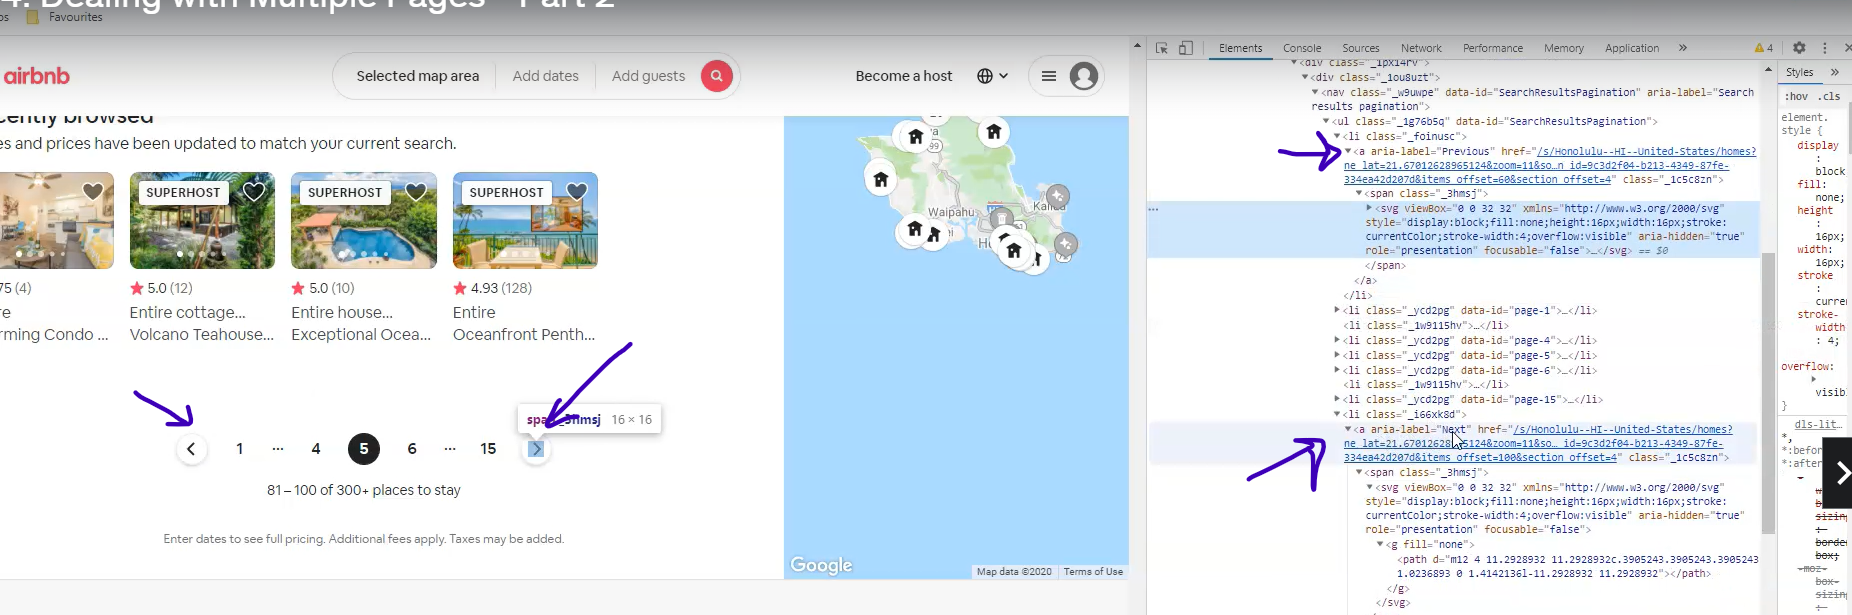

#### But we only want the <a> tag of the Next button

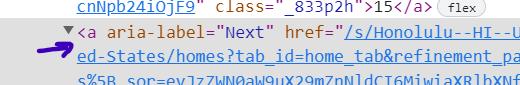

In [23]:
#Get the href of the Next page button
next_page = soup.find('a' , {'aria-label' : 'Next'}).get('href')

In [24]:
next_page

'/s/Honolulu--HI--United-States/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&price_filter_input_type=0&price_filter_num_nights=6&query=Honolulu%2C%20HI&place_id=ChIJTUbDjDsYAHwRbJen81_1KEs&date_picker_type=calendar&checkin=2022-11-25&checkout=2022-12-01&source=structured_search_input_header&search_type=autocomplete_click&federated_search_session_id=90179881-79f4-42df-a502-b436ccc7d7f6&pagination_search=true&cursor=eyJzZWN0aW9uX29mZnNldCI6MiwiaXRlbXNfb2Zmc2V0IjoyMCwidmVyc2lvbiI6MX0%3D'

#### But its not the complete URL as you can see

- The url should start with
https://www.airbnb.com

In [25]:
next_page_full = 'https://www.airbnb.com' + next_page

In [26]:
next_page_full

'https://www.airbnb.com/s/Honolulu--HI--United-States/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&price_filter_input_type=0&price_filter_num_nights=6&query=Honolulu%2C%20HI&place_id=ChIJTUbDjDsYAHwRbJen81_1KEs&date_picker_type=calendar&checkin=2022-11-25&checkout=2022-12-01&source=structured_search_input_header&search_type=autocomplete_click&federated_search_session_id=90179881-79f4-42df-a502-b436ccc7d7f6&pagination_search=true&cursor=eyJzZWN0aW9uX29mZnNldCI6MiwiaXRlbXNfb2Zmc2V0IjoyMCwidmVyc2lvbiI6MX0%3D'

#### Now we will put this in the url tag and we are going to call it using requests.get and get the 'html' using "Beautiful Soup"

In [29]:
url = next_page_full
page = requests.get(url)
soup = BeautifulSoup(page.text , 'lxml')

#### We are going to use a loop that loops through all these pages
- The loop goes to the Arrow tag here , grab the href or url
- Like this , its gonna keep going until its on Page 15
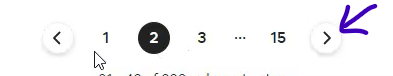

#### When we get on Page 15 , you can see there is no "Arrow" here
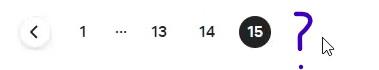

#### Since there is no "Arrow" the loop's going to stop , so when we use "while True" loop
- Its going to run all these lines until it gets to page : 15
- When the "Arrow tag" or the "Next" button is no longer present 
- This code is going to get an error
- next_page = soup.find('a' , {'aria-label' : 'Next'}).get('href')
- And the LOOP will stop and that means we are on the Last page

In [ ]:
while True:
    next_page = soup.find('a', {'aria-label' : 'Next'}).get('href')
    next_page_full = 'https://www.airbnb.com' + next_page
    url = next_page_full
    page = requests.get(url)
    soup = BeautifulSoup('page.text' , 'lxml')

#### Now in the next step we are going to grab data of each posting on the Webpage
- And we are going to put it in a table
- And we are going to get the posting with the least price on it
- The table will return 300 records because there are 20 postings on each page
- There are a total of 15 pages : 15 X 20 = 300
- We are going to grab the html of each posting
- Data we are going to grab is the "Title" , "Price" , "Rating" and "Description"

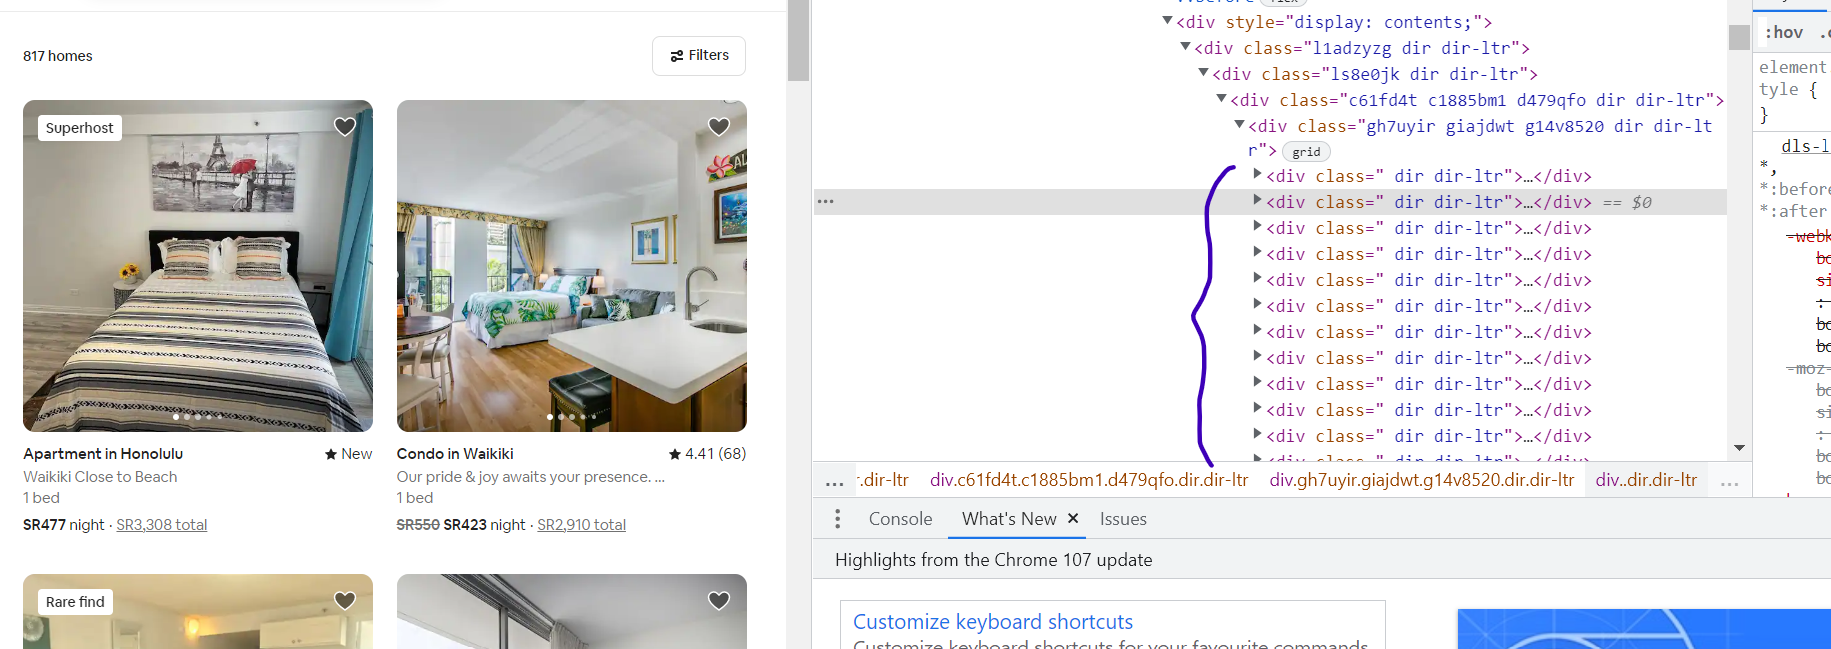

#### So each posting corresponds to the div tag : class = "dir dir-ltr"
- We want this in a while loop 
- The while is going to loop through each page 
- At the TOP part we will have the code to grab the data of all the postings 
- And at the BOTTOM , we have the code to go to the NEXT page 
- So it will grab the data from the Next page 
- And this way Next page > grab data > Next Page > grab data .......until there is no NEXT button

#### In the for loop :

We will grab the "url" of each posting
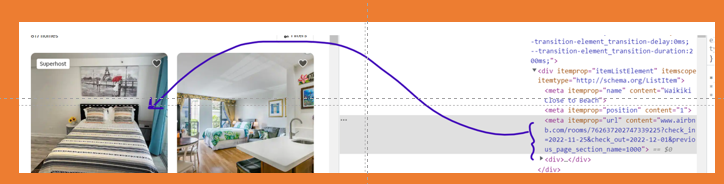

In [49]:
#postings = soup.find_all('div', {'class' : ' dir dir-ltr'})
soup.find('div', {'class': 'c1l1h97y dir dir-ltr'}).find('meta', {'itemprop' : 'url'}).get('content')

'www.airbnb.com/rooms/50683862?check_in=2022-11-25&check_out=2022-12-01&previous_page_section_name=1000'

In [81]:
#Getting the links of all the Postings
postings = soup.find_all('div' ,{'itemprop' : 'itemListElement'})
for post in postings:
    link = post.find('meta' , {'itemprop' : 'url'}).get('content')
    print(link)

www.airbnb.com/rooms/50683862?check_in=2022-11-25&check_out=2022-12-01&previous_page_section_name=1000
www.airbnb.com/rooms/26843809?check_in=2022-11-25&check_out=2022-12-01&previous_page_section_name=1000
www.airbnb.com/rooms/42001934?check_in=2022-11-25&check_out=2022-12-01&previous_page_section_name=1000
www.airbnb.com/rooms/24452017?check_in=2022-11-25&check_out=2022-12-01&previous_page_section_name=1000
www.airbnb.com/rooms/12153149?check_in=2022-11-25&check_out=2022-12-01&previous_page_section_name=1000
www.airbnb.com/rooms/45304874?check_in=2022-11-25&check_out=2022-12-01&previous_page_section_name=1000
www.airbnb.com/rooms/39677329?check_in=2022-11-25&check_out=2022-12-01&previous_page_section_name=1000
www.airbnb.com/rooms/759052723890465013?check_in=2022-11-25&check_out=2022-12-01&previous_page_section_name=1000
www.airbnb.com/rooms/47875992?check_in=2022-11-25&check_out=2022-12-01&previous_page_section_name=1000
www.airbnb.com/rooms/45495103?check_in=2022-11-25&check_out=202

In [118]:
#creating an empty dataframe
df = pd.DataFrame({'Links' : [''] , 'Title' : [''] , 'Price' : [''] , 'Rating' : [''] , 'Details' : ['']})

In [101]:
df

,Links,Title,Price,Rating,Details
0,,,,,


In [167]:
soup

<html><body><p>page.text</p></body></html>

In [170]:
df = pd.DataFrame({'Links' : [''] , 'Title' : [''] , 'Price' : [''] , 'Rating' : [''] , 'Details' : ['']})
url = 'https://www.airbnb.com/s/Honolulu--HI--United-States/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&price_filter_input_type=0&price_filter_num_nights=6&query=Honolulu%2C%20HI&place_id=ChIJTUbDjDsYAHwRbJen81_1KEs&date_picker_type=calendar&checkin=2022-11-25&checkout=2022-12-01&source=structured_search_input_header&search_type=autocomplete_click&federated_search_session_id=90179881-79f4-42df-a502-b436ccc7d7f6&pagination_search=true&cursor=eyJzZWN0aW9uX29mZnNldCI6MCwiaXRlbXNfb2Zmc2V0IjowLCJ2ZXJzaW9uIjoxfQ%3D%3D'
page = requests.get(url)
soup = BeautifulSoup(page.text , 'lxml')

while True:
    #Getting the links of all the Postings
    time.sleep(5)
    postings = soup.find_all('div' ,{'itemprop' : 'itemListElement'})
    for post in postings:
        try:
            link = post.find('meta' , {'itemprop' : 'url'}).get('content')
        except:
            link ='na'
        try:
            title = post.find('div' ,{'class' : 't1jojoys dir dir-ltr'}).text
        except:
            title = 'na'
        try:
            price = post.find('div' ,{'class' : 'p11pu8yw dir dir-ltr'}).text.split()[0]
        except:
            price = 'na'
        try:
            rating = post.find('span' , {'class' : 'r1dxllyb dir dir-ltr'}).text
        except:
            rating = 'na'
        try:
            details = post.find('div' , {'class' : 'nquyp1l s1cjsi4j dir dir-ltr'}).text
        except:
            details = 'na'

        df = df.append({'Links' : link , 'Title' : title , 'Price' : price , 'Rating' : rating , 'Details' : details},
                  ignore_index = True)
    
    time.sleep(10)
    next_page = soup.find('a', {'aria-label' : 'Next'}).get('href')
    next_page_full = 'https://www.airbnb.com' + next_page
    url = next_page_full
    page = requests.get(url)
    soup = BeautifulSoup(page.text , 'lxml')

AttributeError: 'NoneType' object has no attribute 'get'

In [172]:
df.shape

(301, 5)

In [173]:
df.head()

,Links,Title,Price,Rating,Details
0,,,,,
1,www.airbnb.com/rooms/762637202747339225?check_...,Apartment in Honolulu,SR477,New,Waikiki Close to Beach
2,www.airbnb.com/rooms/760943515534292663?check_...,Apartment in Waikiki,SR335,New,"Cozy Monarch Studio | Ocean View | Pool, Grill..."
3,www.airbnb.com/rooms/46988727?check_in=2022-11...,Condo in Waikiki,SR547,4.82 (77),Waikiki Studio with Balcony 1 block from the B...
4,www.airbnb.com/rooms/40212308?check_in=2022-11...,Condo in Waikiki,"SR1,461",4.91 (78),WAIKIKI AMAZING VIEWS 1/1 Beachfront Condo
